# 9.Proje-Feedback Prize - English Language Learning

"Feedback Prize - English Language Learning" adlı proje, İngilizce dil öğrenme süreçlerini iyileştirmeyi hedefleyen bir yarışmadır Projelerin amacı, İngilizce dil öğrenen bireylerin dil becerilerini geliştirmelerine yardımcı olmak, geri bildirim almayı teşvik etmek ve bu süreci daha eğlenceli ve etkili hale getirmektir.

Projenin amaçları şunlar olabilir:

1. **Dil Becerilerinin İyileştirilmesi**: İngilizce öğrenenlerin konuşma, dinleme, yazma ve okuma becerilerini geliştirmek.

2. **Geri Bildirim Verme ve Alma Sürecini Kolaylaştırmak**: Dil öğrenenlerin daha fazla geri bildirim almasını sağlamak ve aynı zamanda öğrencilere geri bildirim verme sürecini iyileştirmek.

3. **Teknoloji Kullanımı**: Dil öğrenme uygulamaları veya platformları üzerinden teknolojiyi kullanarak öğrencilere özelleştirilmiş öğrenme deneyimleri sunmak.

4. **İngilizce Eğitimini Daha Erişilebilir Hale Getirmek**: Daha fazla kişiye İngilizce dil öğrenme fırsatları sunmak, coğrafi ve ekonomik engelleri aşmak.

5. **İngilizce Dil Becerilerini Değerlendirmek**: Öğrencilerin dil becerilerini düzenli olarak değerlendirmek ve ilerlemelerini takip etmek.

Bu projenin sonunda, öğrencilere veya katılımcılara ödüller veya özel fırsatlar sunularak dil öğrenme motivasyonlarını artırabilirler. Ayrıca, projelerin veya yarışmanın sonuçları, İngilizce öğretimi ve öğrenimini iyileştirmek için kullanılabilir.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
import scipy
import math
import plotly.express as px
import statsmodels.api as sm

In [7]:
import kaggle

In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [9]:
api= KaggleApi()
api.authenticate()

In [10]:
api.competition_download_file("feedback-prize-english-language-learning",
                             "train.csv")

100%|█████████████████████████████████████████████████████████████████████████████| 2.80M/2.80M [00:01<00:00, 2.13MB/s]

In [11]:
import zipfile

# Sıkıştırılmış dosyayı çıkartma
with zipfile.ZipFile("train.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# "train.csv" dosyasını DataFrame olarak okuma
df = pd.read_csv("train.csv")

In [12]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [13]:
api.competition_download_file("feedback-prize-english-language-learning",
                             "test.csv")

100%|█████████████████████████████████████████████████████████████████████████████████████| 8.61k/8.61k [00:00<?, ?B/s]

In [16]:
# Dosyayı okuma
dftest = pd.read_csv("C:/Users/LENOVO/Desktop/AI Bedia/Project Based Learning Level-2/2-Random KAGGLE 20 Proje/09.Proje/test.csv")

# Veriyi inceleme
print(dftest.head())  # İlk beş satırı görüntüler

        text_id                                          full_text
0  0000C359D63E  when a person has no experience on a job their...
1  000BAD50D026  Do you think students would benefit from being...
2  00367BB2546B  Thomas Jefferson once states that "it is wonde...


In [18]:
dftest.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [20]:
print(df.shape)
print(dftest.shape)

(3911, 8)
(3, 2)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


1. `text_id`: Metin örneklerinin benzersiz kimliklerini içeren sütun. Her bir metin örneği için farklı bir `text_id` değeri vardır.

2. `full_text`: Metin örneklerini içeren sütun. Her satır, bir metin örneğini temsil eder.

3. `cohesion`: Metindeki cümlelerin veya paragrafların içsel bağlantısını değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki fikirlerin ve ifadelerin birbiriyle uyumlu bir şekilde nasıl birleştiğini belirlemeye yardımcı olabilir.

4. `syntax`: Metindeki dilbilgisi yapısını değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki cümlelerin yapısının ve dili kullanımının doğruluğunu değerlendirebilir.

5. `vocabulary`: Metindeki kelime dağarcığını değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki kelime çeşitliliğini ve kullanılan terimlerin zenginliğini gösterir.

6. `phraseology`: Metindeki ifade ve deyimlerin kullanımını değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki ifadelerin yerinde ve uygun bir şekilde nasıl kullanıldığını gösterir.

7. `grammar`: Metindeki dilbilgisinin doğruluğunu değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki dilbilgisi hatalarını ve doğruluğunu değerlendirebilir.

8. `conventions`: Metindeki dilbilgisi kurallarına ve yazım kurallarına uygunluğu değerlendiren bir sayısal ölçüdür. Bu ölçüm, metindeki yazım, noktalama işareti kullanımı ve diğer yazım kurallarının uygunluğunu değerlendirebilir.

Bu veri çerçevesi, metinlerin dilbilgisi, kelime dağarcığı ve ifade kullanımı açısından değerlendirildiği bir metin madenciliği veya dil analizi çalışması için kullanılabilir. Veri setindeki her bir metin örneği, bu dilbilgisi ve yazım değerlendirmelerinin sonuçlarını içerir.

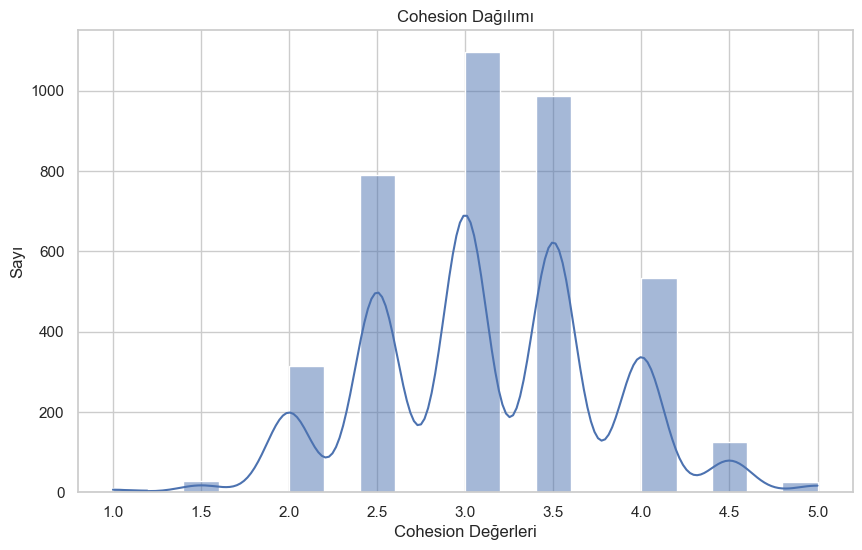

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Örnek olarak cohesion sütunu için histogram
sns.histplot(data=df, x="cohesion", bins=20, kde=True)
plt.title("Cohesion Dağılımı")
plt.xlabel("Cohesion Değerleri")
plt.ylabel("Sayı")
plt.show()

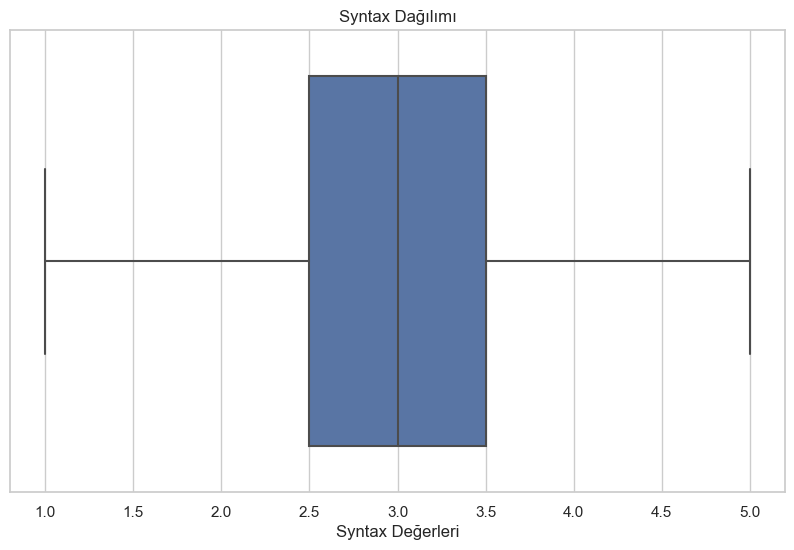

In [25]:
plt.figure(figsize=(10, 6))
# Örnek olarak syntax sütunu için kutu grafiği
sns.boxplot(data=df, x="syntax")
plt.title("Syntax Dağılımı")
plt.xlabel("Syntax Değerleri")
plt.show()

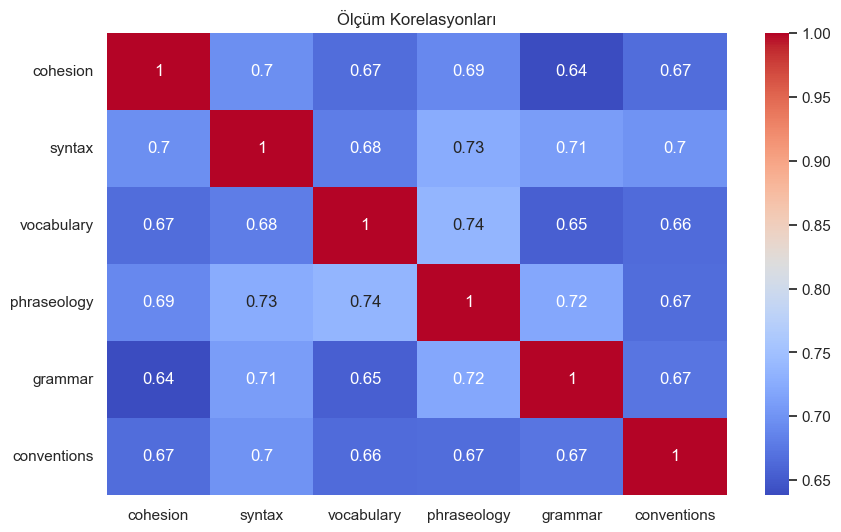

In [26]:
plt.figure(figsize=(10, 6))
# Korelasyon matrisi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Ölçüm Korelasyonları")
plt.show()

In [27]:
df.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'],
      dtype='object')

In [28]:
#1-küçük harfe çevireceğiz
df["full_text"]=df["full_text"].str.lower()
#2-noktalama işaretlerini kaldıracağız
df["full_text"]=df["full_text"].str.replace('[^\w\s]','')
df["full_text"]=df["full_text"].str.replace('\n','')
#3-rakamları kaldır
df["full_text"]=df["full_text"].str.replace('\d+','')
#4-satır başlarını kaldır
df["full_text"]=df["full_text"].str.replace('\r','')
df["full_text"].replace({'r"[\s]+"':''},regex=True,inplace=True)
#Gereksiz boşlukları(whitespaces) kaldırdık

In [29]:
from unicodedata import normalize
df["full_text"]=df["full_text"].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Aksanları ortadan kaldırdık

In [30]:
# 5-Gereksiz kelimeleri çıkart (Stopwords)
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df["full_text"]=df["full_text"].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))
#Gereksiz kelimeleri kaldırdık

In [31]:
# 6-Tokenize et
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df["full_text"].values]

In [32]:
# 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df["full_text"].values]

In [33]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [35]:
from textblob import TextBlob

def lemmafn(text):
    words = TextBlob(text).words
    lemmatized_words = [word.lemmatize() for word in words]
    return ' '.join(lemmatized_words)

df["full_text_lemmatized"] = df["full_text"].apply(lemmafn)

In [36]:
# Polarity / Subjectivity
from textblob import TextBlob
df[['polarity','subjectivity']]=df["full_text"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [37]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenized,lemmatize,full_text_lemmatized,polarity,subjectivity
0,0016926B079C,think students would benefit learning homebeca...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[t, h, i, n, k, , s, t, u, d, e, n, t, s, , ...",think student would benefit learning homebecau...,0.040909,0.519697
1,0022683E9EA5,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[p, r, o, b, l, e, m, , c, h, a, n, g, e, , ...",problem change let best matter happening chang...,0.088333,0.568148
2,00299B378633,dear principalif u change school policy grade ...,3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principalif, u, change, school, policy,...","[d, e, a, r, , p, r, i, n, c, i, p, a, l, i, ...",dear principalif u change school policy grade ...,0.055952,0.532187
3,003885A45F42,best time life become agree greatest accomplis...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[b, e, s, t, , t, i, m, e, , l, i, f, e, , ...",best time life become agree greatest accomplis...,0.161424,0.609341
4,0049B1DF5CCC,small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[s, m, a, l, l, , a, c, t, , k, i, n, d, n, ...",small act kindness impact people change people...,0.277548,0.544353


In [38]:
# yukarıda çıkan sonuçları tek rakama dönüştürelim
df.loc[df['subjectivity']>0.5,'sentiment']=1 #pozitive
df.loc[df['subjectivity']==0.5,'sentiment']=0 #neutral
df.loc[df['subjectivity']<0.5,'sentiment']=-1 #negative
df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenized,lemmatize,full_text_lemmatized,polarity,subjectivity,sentiment
0,0016926B079C,think students would benefit learning homebeca...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[t, h, i, n, k, , s, t, u, d, e, n, t, s, , ...",think student would benefit learning homebecau...,0.040909,0.519697,1.0
1,0022683E9EA5,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[p, r, o, b, l, e, m, , c, h, a, n, g, e, , ...",problem change let best matter happening chang...,0.088333,0.568148,1.0
2,00299B378633,dear principalif u change school policy grade ...,3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principalif, u, change, school, policy,...","[d, e, a, r, , p, r, i, n, c, i, p, a, l, i, ...",dear principalif u change school policy grade ...,0.055952,0.532187,1.0
3,003885A45F42,best time life become agree greatest accomplis...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[b, e, s, t, , t, i, m, e, , l, i, f, e, , ...",best time life become agree greatest accomplis...,0.161424,0.609341,1.0
4,0049B1DF5CCC,small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[s, m, a, l, l, , a, c, t, , k, i, n, d, n, ...",small act kindness impact people change people...,0.277548,0.544353,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,believe using cellphones class education us go...,2.5,3.0,3.0,3.5,2.5,2.5,"[believe, using, cellphones, class, education,...","[b, e, l, i, e, v, e, , u, s, i, n, g, , c, ...",believe using cellphone class education u good...,-0.064286,0.612798,1.0
3907,FFD9A83B0849,working alone students argue decission proyect...,4.0,4.0,4.0,4.0,3.5,3.0,"[working, alone, students, argue, decission, p...","[w, o, r, k, i, n, g, , a, l, o, n, e, , s, ...",working alone student argue decission proyects...,0.215934,0.490888,-1.0
3908,FFDC4011AC9C,problem chance best think quote cant best ever...,2.5,3.0,3.0,3.0,3.5,3.0,"[problem, chance, best, think, quote, cant, be...","[p, r, o, b, l, e, m, , c, h, a, n, c, e, , ...",problem chance best think quote cant best ever...,0.363462,0.355037,-1.0
3909,FFE16D704B16,many people disagree albert schweitzers quote ...,4.0,4.5,4.5,4.0,4.5,4.5,"[many, people, disagree, albert, schweitzers, ...","[m, a, n, y, , p, e, o, p, l, e, , d, i, s, ...",many people disagree albert schweitzer quote e...,0.345492,0.590828,1.0


In [39]:
df.sentiment.value_counts()

-1.0    2023
 1.0    1884
 0.0       4
Name: sentiment, dtype: int64

In [40]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df["full_text"])
X_test = tfidf_vectorizer.transform(test_df["full_text"])

In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, train_df[["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]])

MultiOutputRegressor(estimator=LinearRegression())

In [43]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_train)
mse = mean_squared_error(train_df[["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]], predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.3865471403452587e-08


In [48]:
from sklearn.metrics import r2_score

# Eğitim verileri üzerinde tahminlerinizi yapın
train_predictions = model.predict(X_train)

# Eğitim verileri için R2 skorunu hesaplayın
r2_train = r2_score(train_df[["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]], train_predictions)
print(f"R-squared (R2) score for training data: {r2_train}")

R-squared (R2) score for training data: 0.999999967787919


In [44]:
test_predictions = model.predict(X_test)

In [45]:
submission_df = pd.DataFrame(test_predictions, columns=["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"])
submission_df["text_id"] = test_df["text_id"]
submission_df.to_csv("submission.csv", index=False)

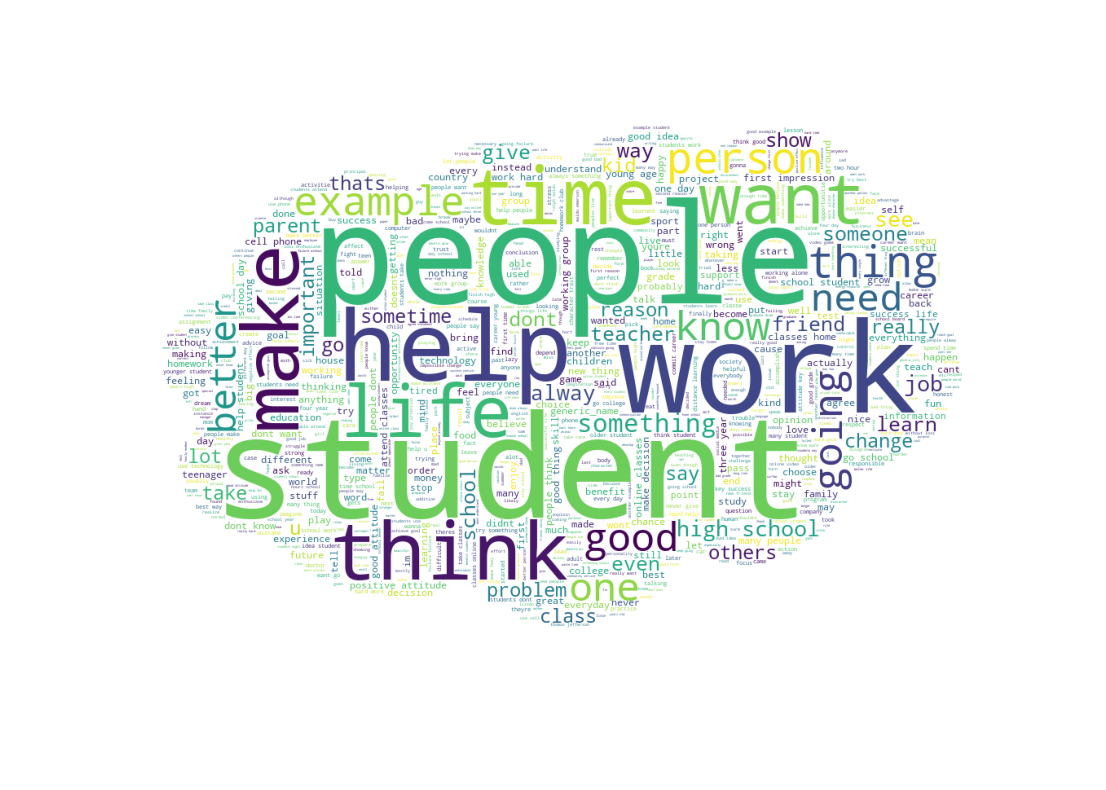

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Veri çerçevesindeki metin sütunundan bir metin alın
text = " ".join(df["full_text"])

# Özel bir maske kullanarak Word Cloud oluşturun (maske yerine farklı bir görüntü dosyası da kullanabilirsiniz)
mask = np.array(Image.open("cloud.png"))

# Stopwords kümesini tanımlayın
stopwords = set(STOPWORDS)

# Word Cloud nesnesini oluşturun ve metinden oluşturun
wc = WordCloud(background_color="white",
              mask=mask,
              max_words=25000,
              stopwords=stopwords)

# Word Cloud'ı görselleştirin
plt.figure(figsize=(20, 10))
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

In [61]:
import pandas as pd
import stylecloud

# "train.csv" dosyasını oku ve sadece "full_text" sütununu seç
df = pd.read_csv("train.csv")
text = " ".join(df["full_text"])

# stylecloud'u oluştur
stylecloud.gen_stylecloud(text, output_name="train.png")

In [62]:
from IPython.display import Image

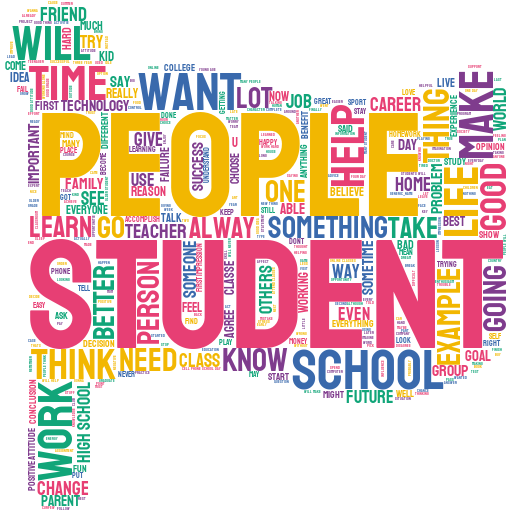

In [63]:
Image('train.png')

In [66]:
df.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'],
      dtype='object')

<Axes: xlabel='cohesion', ylabel='count'>

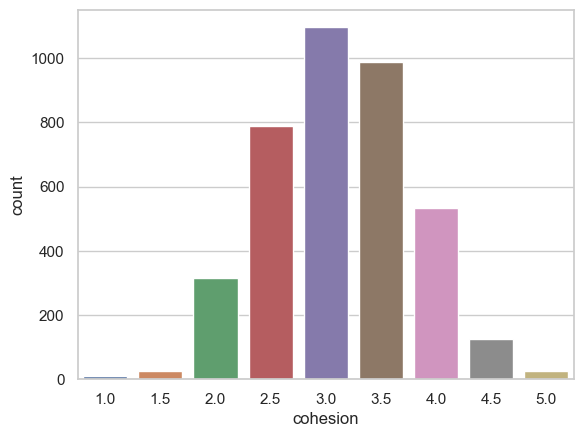

In [67]:
sns.countplot(x=df['cohesion'])

<Axes: xlabel='syntax', ylabel='count'>

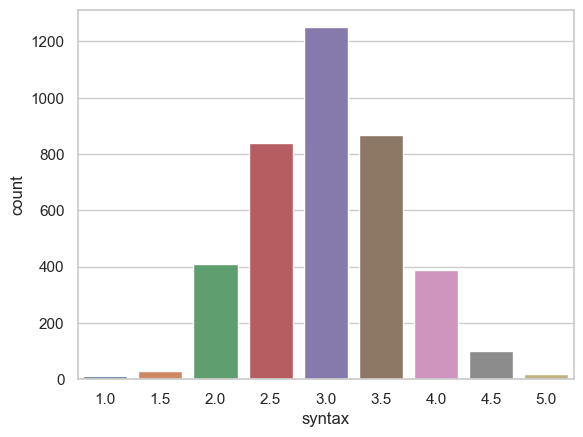

In [68]:
sns.countplot(x=df['syntax'])

<Axes: xlabel='vocabulary', ylabel='count'>

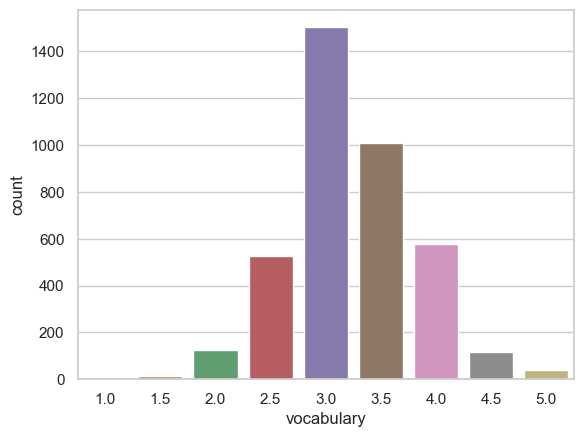

In [69]:
sns.countplot(x=df['vocabulary'])

<Axes: >

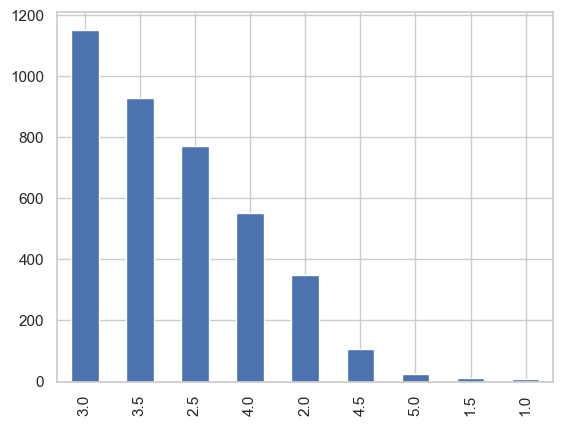

In [70]:
df["phraseology"].value_counts().plot.bar()

<Axes: >

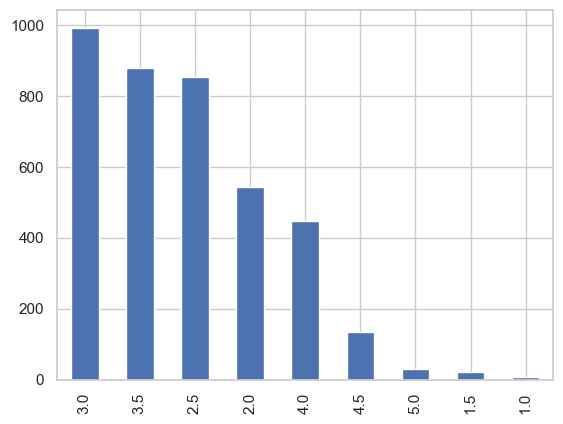

In [71]:
df["grammar"].value_counts().plot.bar()

<Axes: >

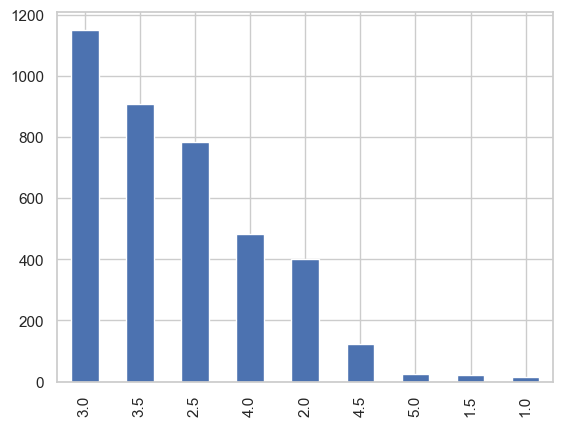

In [72]:
df["conventions"].value_counts().plot.bar()

In [64]:
import joblib

In [65]:
joblib.dump(model, "ENL.joblib")

['ENL.joblib']